In [34]:
import xarray as xr
import xesmf as xe
import numpy as np 
import pathlib as pl
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [35]:
data_path = "../"
database = data_path + "/CO_snotel.db"
dbengine = "sqlite:///{}".format(database)

df_butte     = pd.read_sql_table('380', dbengine)
# df_schofield = pd.read_sql_table('737', dbengine)
# df_taylor    = pd.read_sql_table('1141', dbengine)
df_butte = df_butte.set_index("Date")


In [36]:
butte_loc = 38.89, -106.95

In [37]:
aso_dat1 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20180331_clipped_nobuffer_latlon.nc")
aso_dat2 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20190407_clipped_nobuffer_latlon.nc")

#aso_dat12 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20180524_clipped_nobuffer_latlon.nc")


mp08_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0308_thompson_swcorr")
mp10_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0308_morrison_swcorr")
mp55_run = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0308_ishmael_swcorr")

mp08_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_thompson_2019")
mp10_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_morrison_2019")
mp55_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_ishmael_2019")



# geog file 
geog = xr.open_dataset("../250m_ModelRuns/geo_em_updatedDEM.d01.nc")
east_mask = geog.EAST_MASK.where(geog.EAST_MASK >0)

In [38]:
# get the location of the snotel site on the grid...
xlat = geog.XLAT_M.values[0,:,:]
xlon = geog.XLONG_M.values[0,:,:]
dist = (np.sqrt((xlat - 38.89)**2 + (xlon - (-106.95))**2))
mindist = dist.min()
ixlat = np.argwhere(dist == mindist)[0][0]
ixlon = np.argwhere(dist == mindist)[0][1]


In [39]:
aso_dat1 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20180331_clipped_nobuffer_latlon.nc")
aso_dat2 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20190407_clipped_nobuffer_latlon.nc")

#aso_dat12 = pl.Path("../250m_ModelRuns/regrid250m_ASO_50M_SWE_USCOGE_20180524_clipped_nobuffer_latlon.nc")


mp08_run18 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0308_thompson_swcorr")
mp10_run18 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0308_morrison_swcorr")
mp55_run18 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0308_ishmael_swcorr")

mp08_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_thompson_2019")
mp10_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_morrison_2019")
mp55_run19 = pl.Path("/scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_ishmael_2019")

In [40]:
#ls /scratch/wrudisill/EastLSM_Only/250m_ModelRuns/model_outputs/model_out_0410_thompson_2019

In [41]:
def preproc(ds):
    return ds[["SNEQV", "ACCPRCP"]]

mp08_run19ds = xr.open_mfdataset(mp08_run19.glob("*LDASOUT*"), concat_dim="time", combine='nested', preprocess=preproc)
mp10_run19ds = xr.open_mfdataset(mp10_run19.glob("*LDASOUT*"), concat_dim="time", combine='nested', preprocess=preproc)
mp55_run19ds = xr.open_mfdataset(mp55_run19.glob("*LDASOUT*"), concat_dim="time", combine='nested', preprocess=preproc)

In [42]:
mp08_run18ds = xr.open_mfdataset(mp08_run18.glob("*LDASOUT*"), concat_dim="time", combine='nested', preprocess=preproc)
mp10_run18ds = xr.open_mfdataset(mp10_run18.glob("*LDASOUT*"), concat_dim="time", combine='nested', preprocess=preproc)
mp55_run18ds = xr.open_mfdataset(mp55_run18.glob("*LDASOUT*"), concat_dim="time", combine='nested', preprocess=preproc)

In [43]:
sd = pd.to_datetime("2018-10-01")
ed = pd.to_datetime("2019-09-30")
wy19 = pd.date_range(sd, ed, freq="D")


sd = pd.to_datetime("2017-10-01")
ed = pd.to_datetime("2018-09-30")
wy18 = pd.date_range(sd, ed, freq="D")

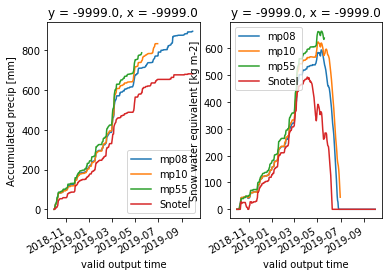

In [44]:
fig,ax = plt.subplots(1,2)

# plot acc. precipitation on the left 
mp08_run19ds.ACCPRCP.isel(x=ixlon, y=ixlat).plot(ax=ax[0], label="mp08")
mp10_run19ds.ACCPRCP.isel(x=ixlon, y=ixlat).plot(ax=ax[0], label="mp10")
mp55_run19ds.ACCPRCP.isel(x=ixlon, y=ixlat).plot(ax=ax[0], label="mp55")
(df_butte.AccPrecip.loc[wy19]*25.4).plot(ax=ax[0], label="Snotel")
ax[0].legend()


# plot swe on the right 
mp08_run19ds.SNEQV.isel(x=ixlon, y=ixlat).plot(ax=ax[1], label="mp08")
mp10_run19ds.SNEQV.isel(x=ixlon, y=ixlat).plot(ax=ax[1], label="mp10")
mp55_run19ds.SNEQV.isel(x=ixlon, y=ixlat).plot(ax=ax[1], label="mp55")


(df_butte.loc[wy19].SWE*25.4).plot(ax=ax[1], label="Snotel")
ax[1].legend()


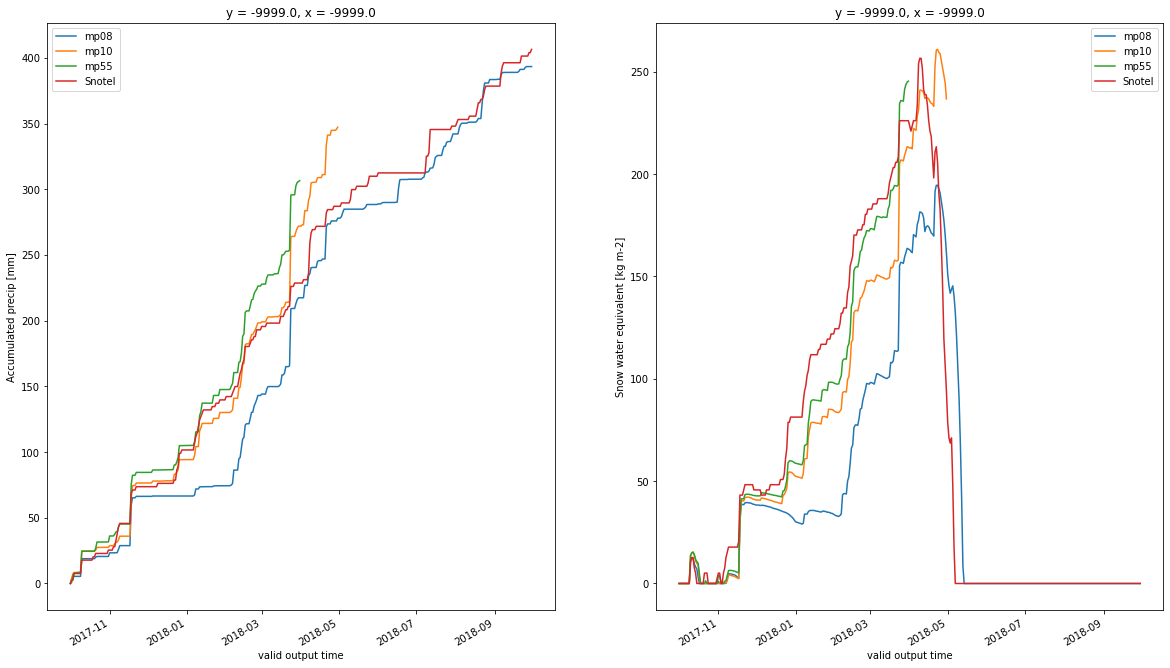

In [47]:
fig,ax = plt.subplots(1,2)
fig.set_size_inches(20,12)
# plot acc. precipitation on the left 

mp08_run18ds.ACCPRCP.isel(x=ixlon, y=ixlat).plot(ax=ax[0], label="mp08")
mp10_run18ds.ACCPRCP.isel(x=ixlon, y=ixlat).plot(ax=ax[0], label="mp10")
mp55_run18ds.ACCPRCP.isel(x=ixlon, y=ixlat).plot(ax=ax[0], label="mp55")
(df_butte.AccPrecip.loc[wy18]*25.4).plot(ax=ax[0], label="Snotel")
ax[0].legend()


# plot swe on the right 
mp08_run18ds.SNEQV.isel(x=ixlon, y=ixlat).plot(ax=ax[1], label="mp08")
mp10_run18ds.SNEQV.isel(x=ixlon, y=ixlat).plot(ax=ax[1], label="mp10")
mp55_run18ds.SNEQV.isel(x=ixlon, y=ixlat).plot(ax=ax[1], label="mp55")


(df_butte.loc[wy18].SWE*25.4).plot(ax=ax[1], label="Snotel")
ax[1].legend()


In [14]:
mp08_run18ds

,Array,Chunk
Bytes,86.58 MB,237.21 kB
Shape,"(365, 199, 149)","(1, 199, 149)"
Count,1095 Tasks,365 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,86.58 MB,237.21 kB
Shape,"(365, 199, 149)","(1, 199, 149)"
Count,1095 Tasks,365 Chunks
Type,float64,numpy.ndarray
